In [1]:
from pathlib import Path
from dysh.util.download import from_url
from dysh.fits.gbtfitsload import GBTFITSLoad

In [2]:
url = "http://www.gb.nrao.edu/dysh/example_data/subbeamnod/data/AGBT13A_124_06/AGBT13A_124_06.raw.acs/AGBT13A_124_06.raw.acs.fits"
savepath = Path.cwd() / "data"
filename = from_url(url, savepath)

Starting download...
AGBT13A_124_06.raw.acs.fits already downloaded at /users/esmith/Git/dysh/notebooks/examples/data


In [3]:
sdfits = GBTFITSLoad(filename)

In [4]:
sdfits.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,44,vIIzw31,16090.0,SubBeamNod,1,48.940955,48.990955,2,2,100,2,353.896698,47.758182


In [5]:
sbn_scan_block = sdfits.subbeamnod(scan=44, fdnum=1, ifnum=0, plnum=0, method='cycle')

In [6]:
ta = sbn_scan_block.timeaverage()

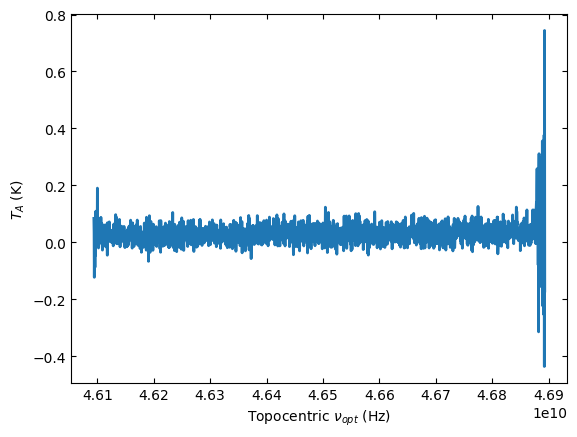

In [7]:
ta.plot()

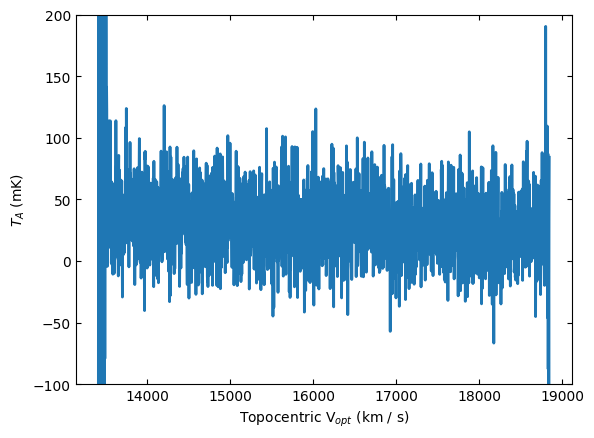

In [8]:
ta.plot(xaxis_unit="km/s", yaxis_unit="mK", ymin=-100, ymax=200)

In [9]:
sbn_scan_block2 = sdfits.subbeamnod(scan=44, fdnum=1, ifnum=0, plnum=0, method='scan')

In [10]:
ta2 = sbn_scan_block2.timeaverage()

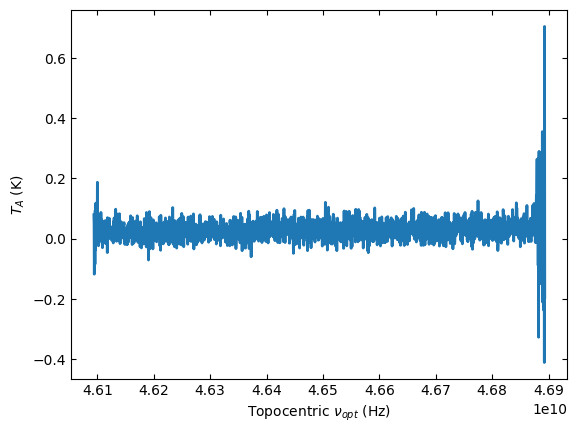

In [11]:
ta2.plot()

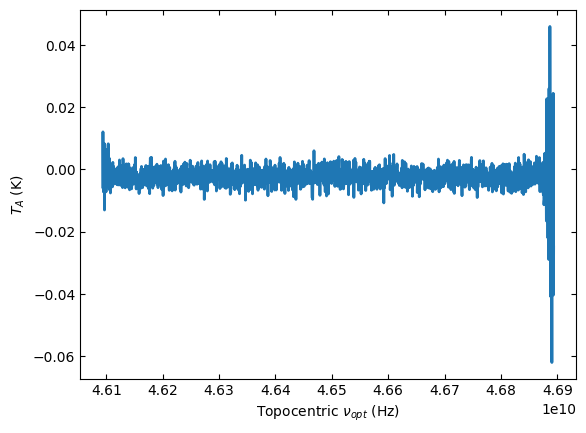

In [12]:
(ta2 - ta).plot()

In [13]:
sdfits.select(scan=44, fdnum=1, ifnum=0)
sdfits.selection.show()

 ID    TAG    SCAN IFNUM FDNUM # SELECTED
--- --------- ---- ----- ----- ----------
  0 3f6a65622   44     0     1        400


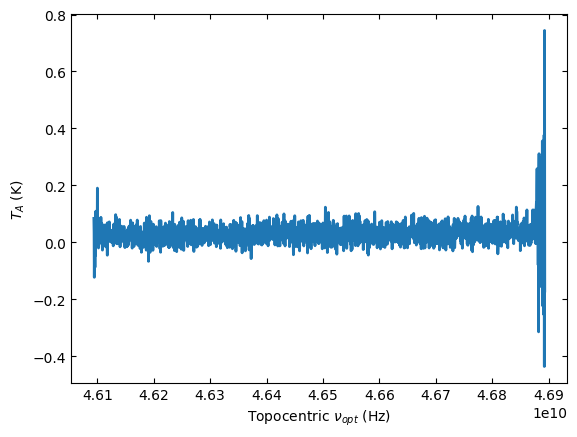

In [14]:
sbn_scan_block3 = sdfits.subbeamnod(plnum=0)
ta3 = sbn_scan_block3.timeaverage()
ta3.plot()

In [15]:
sbn_scan_block4 = sdfits.subbeamnod(plnum=1)
ta4 = sbn_scan_block4.timeaverage()
pol_avg = 0.5*(ta3 + ta4)

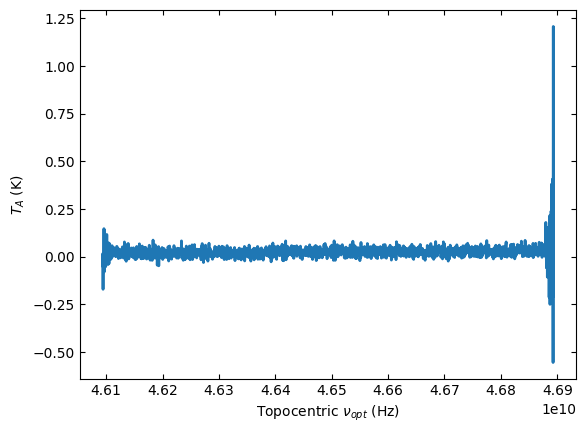

In [16]:
pol_avg.plot()